In [8]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd


# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)

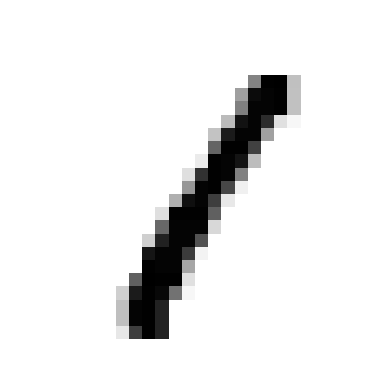

In [9]:
import matplotlib.pyplot as plt

# Define function to plot a single digit
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[3]
plot_digit(some_digit)
plt.show()

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_mnist_train, y_mnist_train)

value = sgd_clf.predict([some_digit])

print(f'value: {value}')


y_predicted = sgd_clf.predict(X_mnist_test)
accuracy = accuracy_score(y_mnist_test, y_predicted)
print(f'accuracy: {accuracy}')


value: [1]
accuracy: 0.8707142857142857


In [11]:
from sklearn.model_selection import cross_val_score

# Scikit learn makes it easy to use cross validation with simple measures
# CV is the number of folds
cross_val_score(sgd_clf, X_mnist_train, y_mnist_train, cv=3, scoring="accuracy")

array([0.86073915, 0.87091591, 0.85048232])

**To Turn In**

Choose three different classifiers (not using any neural networks) and see which performs better on the dataset.  Please include code that cleanly demonstrates the three models you have attempted to use.

**Rules:**
1.  Ensure you compare them in consistent ways.
2.  Ensure there is no data leakage between the training and test set.

**Answer the following questions:**

0. What data cleaning did you attempt to do?

I performed exploratory data analysis (EDA) and did not find any need for data cleaning. There were no missing values or duplicates, and the classes appeared balanced.

For data preprocessing, I used StandardScaler to normalize the data and Principal Component Analysis (PCA) to reduce the number of features and simplify the model.

1. Which models did you try?  Include a link to the documentation for the model you are using.

- Support Vector Classification https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- Random Forest Classifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Logistic Regression CV https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html


2. Which hyperparamaters did you choose and why?

- For SVC, I chose C, the regularization parameter, to control the trade-off between regularization strength and model performance.
- For Random Forest, I chose n_estimators, the number of trees in the forest, to balance performance and computational costs.
- For Logistic Regression, I selected the penalty parameter, using L1 (Lasso regularization), which could potentially help ignore background pixels that do not contribute to the classification task.


3. How did you evaluate the models?  Which metric did you choose to use, why?

I decided to look at all the metrics covered in class to understand their differences. Since the data is balanced, accuracy could be used alone, but I explored other metrics for deeper insight.

- Accuracy: The ratio of correctly predicted instances to the total instances. (e.g., accuracy is 98% if the model correctly predicts 98 out of 100 digits.)
- Precision: Measures how many of the predicted positive instances were actually positive. (e.g., precision is 80% if the model predicts 50 digits as a 3, but only 40 of them are actually 3s.)
- Recall: Measures how many actual positive instances were correctly predicted by the model. (e.g., recall is 70% if the model correctly identifies 70 out of 100 examples of the digit 3.)
- F1-Score: The harmonic mean of precision and recall. (e.g., if the model has a precision of 80% and recall of 70%, the F1-score will be around 74%.)
- ROC-AUC: Measures the model’s performance across all classification thresholds.
- Confusion Matrix: Provides a complete breakdown of the classification results, showing where the model is making correct predictions and where it’s making mistakes.

4. How do you know your solution is not overfit or underfit?

I used k-fold cross-validation to assess how well the model generalizes to unseen data. If the cross-validation results vary widely between folds or the training score is much higher than the cross-validation score, overfitting might be occurring. If both the training score and cross-validation score are low, the model is likely underfitting. In our case, the performance is high and stable, indicating that the models are neither overfitting nor underfitting.


### EDA

In [12]:
X_mnist_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y_mnist_train

array([5, 7, 2, ..., 6, 9, 0])

In [14]:
# Check for missing values
print(pd.DataFrame(X_mnist_train).isnull().sum().sum()) 

0


In [15]:
# Check for duplicates
num_duplicates = len(X_mnist_train) - len(np.unique(X_mnist_train, axis=0))
num_duplicates

0

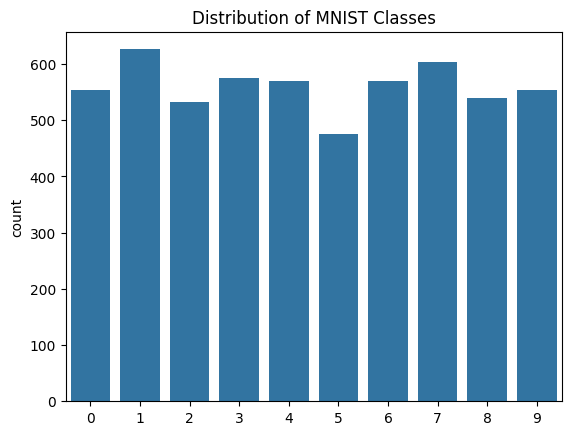

In [16]:
# Check the distribution of target classes (digits)
sns.countplot(x=y_mnist_train)
plt.title('Distribution of MNIST Classes')
plt.show()

In [17]:
pd.DataFrame(X_mnist_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,5600.0,5600.0,5600.0,5600.0,5600.0,5600.0,5600.0,5600.0,5600.0,5600.0,...,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.0,5600.0,5600.0,5600.0,5600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225179,0.137143,0.075714,0.061250,0.060179,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.488715,4.412283,4.002542,2.788938,2.737315,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,187.000000,154.000000,0.0,0.0,0.0,0.0,0.0


### Modeling

In [18]:
# Define the classifiers with pipelines

pipelines = {
    "SVC": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('svc', SVC(probability=True, random_state=42, C=1.5))
    ]),
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('rf', RandomForestClassifier(random_state=42, n_estimators=200))
    ]),
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42, penalty='l1', solver='liblinear'))
    ])
}

In [19]:
# Train and evaluate each pipeline

results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_mnist_train, y_mnist_train)
    
    # Predictions on the test set
    y_pred = pipeline.predict(X_mnist_test)
    
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_mnist_test, y_pred)
    precision = precision_score(y_mnist_test, y_pred, average='macro')
    recall = recall_score(y_mnist_test, y_pred, average='macro')
    f1 = f1_score(y_mnist_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_mnist_test, pipeline.predict_proba(X_mnist_test), multi_class='ovr')
    confusion = confusion_matrix(y_mnist_test, y_pred)
    
    # Save results
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": confusion
    }

In [20]:
results['SVC']

{'accuracy': 0.9485714285714286,
 'precision': np.float64(0.9486636403762925),
 'recall': np.float64(0.9469782983142915),
 'f1_score': np.float64(0.9475267985119024),
 'roc_auc': np.float64(0.9976103477680056),
 'confusion_matrix': array([[135,   0,   1,   0,   0,   0,   1,   0,   1,   0],
        [  0, 157,   1,   0,   0,   0,   0,   0,   0,   0],
        [  2,   0, 134,   2,   1,   0,   0,   1,   1,   1],
        [  0,   1,   6, 125,   0,   4,   1,   1,   2,   1],
        [  0,   1,   2,   0, 140,   0,   0,   0,   0,   3],
        [  1,   1,   1,   2,   0, 125,   3,   1,   0,   0],
        [  0,   0,   4,   0,   0,   1, 134,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,   0, 147,   0,   2],
        [  1,   0,   2,   2,   0,   4,   0,   1, 101,   0],
        [  1,   1,   0,   2,   1,   0,   0,   5,   1, 130]])}

In [22]:
results['RandomForest']

{'accuracy': 0.915,
 'precision': np.float64(0.9137984004086237),
 'recall': np.float64(0.9120153981689763),
 'f1_score': np.float64(0.9121862193945628),
 'roc_auc': np.float64(0.9928802239574971),
 'confusion_matrix': array([[130,   0,   0,   3,   0,   1,   3,   0,   1,   0],
        [  0, 158,   0,   0,   0,   0,   0,   0,   0,   0],
        [  1,   1, 124,   6,   1,   0,   3,   2,   3,   1],
        [  0,   0,   9, 125,   0,   1,   1,   1,   3,   1],
        [  0,   2,   2,   0, 135,   1,   1,   0,   0,   5],
        [  1,   0,   2,  10,   0, 109,   0,   0,   9,   3],
        [  1,   0,   1,   0,   1,   1, 135,   0,   0,   0],
        [  0,   0,   0,   1,   2,   0,   0, 145,   0,   2],
        [  1,   0,   2,   7,   2,   3,   0,   1,  95,   0],
        [  3,   1,   0,   2,   2,   0,   0,   6,   2, 125]])}

In [24]:
results['LogisticRegression']

{'accuracy': 0.9007142857142857,
 'precision': np.float64(0.8997980450985539),
 'recall': np.float64(0.8978974211778379),
 'f1_score': np.float64(0.8981375319425832),
 'roc_auc': np.float64(0.9856958882058008),
 'confusion_matrix': array([[130,   0,   0,   1,   0,   0,   4,   1,   2,   0],
        [  0, 156,   1,   0,   0,   0,   0,   0,   1,   0],
        [  2,   1, 119,   3,   2,   2,   1,   7,   4,   1],
        [  1,   2,   7, 117,   1,   5,   2,   1,   2,   3],
        [  0,   2,   1,   1, 131,   0,   2,   0,   2,   7],
        [  1,   2,   1,   5,   1, 114,   2,   2,   4,   2],
        [  0,   0,   1,   0,   2,   2, 134,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,   0, 145,   0,   4],
        [  1,   3,   1,   4,   3,   3,   1,   1,  93,   1],
        [  0,   0,   1,   3,   1,   1,   0,  12,   1, 122]])}

In [26]:
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_mnist_train, y_mnist_train, cv=5)
    print(f"\nCross-Validation Scores for {name}: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f}")


Cross-Validation Scores for SVC: [0.93035714 0.93660714 0.93303571 0.93303571 0.925     ]
Mean CV Score: 0.9316

Cross-Validation Scores for RandomForest: [0.90803571 0.91339286 0.90714286 0.89464286 0.90178571]
Mean CV Score: 0.9050

Cross-Validation Scores for LogisticRegression: [0.89642857 0.88660714 0.90982143 0.90535714 0.88214286]
Mean CV Score: 0.8961
